### Read processed data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pickle
from os import path

# file path and file name
fname = path.join('data', "No_Osc, 1e13m, 1e13s, v=1.00, A=0.002,")

with open(fname + r" -plot.bin", 'rb') as file:
    parameters = pickle.load(file)
    result_rmin = pickle.load(file)
    result_rmin_ave = pickle.load(file)
    result_escape = pickle.load(file)
    result_escape_ave = pickle.load(file)
    result_fallin = pickle.load(file)
    result_fallin_ave = pickle.load(file)

with open(fname + r" -config.bin", 'rb') as file:
    pickle.load(file)
    filename, omega, v_c, g_c, GM = pickle.load(file)

thetas = np.rad2deg(parameters[0,0,0,:,0,3])
phi_cs = np.rad2deg(parameters[0,0,0,0,:,4])
print('v_c:', v_c/1000, 'km/s')
print('A:', g_c/(8*np.pi*6.6743/np.sqrt(3.085))*10, 'kg/(m^2*kpc^(1/2))')
print('thetas:', thetas, 'degree')
print('phi_cs:', phi_cs, 'degree')

v_c: 1.0 km/s
A: 0.02 kg/(m^2*kpc^(1/2))
thetas: [90.] degree
phi_cs: [180.] degree


In [ ]:
# %matplotlib tk
# %matplotlib inline

escape probability

In [3]:
# set theta and phi_c values
theta = 0
phi_c = 0
# change unit of X into 10^3 AU
X = (parameters[:,:,0,0,0,0] / (1.5e-2))/1e3
Y = parameters[:,:,0,0,0,1]

print('theta =', thetas[theta])
print('phi_c =', phi_cs[phi_c])

theta = 90.0
phi_c = 180.0


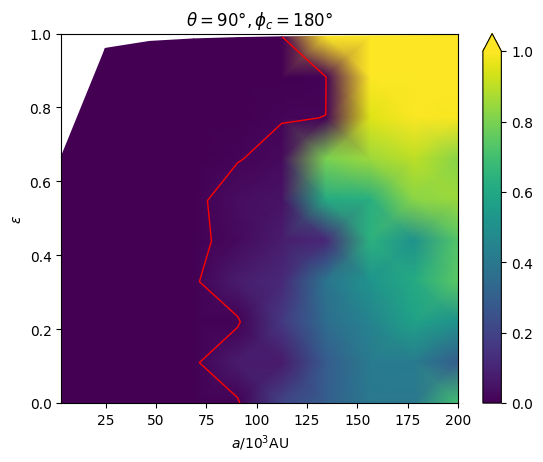

In [4]:
fig, ax = plt.subplots()
ax.set_title(r'$\theta={}\degree, \phi_c={}\degree$'.format('%d'%thetas[theta],'%d'%phi_cs[phi_c]))
ax.set_xlabel(r'$a/10^3\mathrm{AU}$')
ax.set_ylabel(r'$\epsilon$')

# plot data and 0 probability contour
cax = ax.pcolormesh(X, Y, result_escape_ave[:,:,theta,phi_c], shading='gouraud')
plt.contour(X, Y, result_escape_ave[:,:,theta,phi_c], levels=[0.01, ], colors='r', linewidths=1.)
# add the colorbar
cbar = fig.colorbar(cax, extend='max')
cax.set_clim(0, 1)
ax.set_ylim([0, 1])
ax.set_xlim([3,200])
plt.show()

fall in probability

In [5]:
# set theta and phi_c values
theta = 0
phi_c = 0
# change unit of X into 10^3 AU
X = (parameters[:,:,0,0,0,0]/(1.5e-2))/1e3
Y = parameters[:,:,0,0,0,1]

print('theta =', thetas[theta])
print('phi_c =', phi_cs[phi_c])

theta = 90.0
phi_c = 180.0


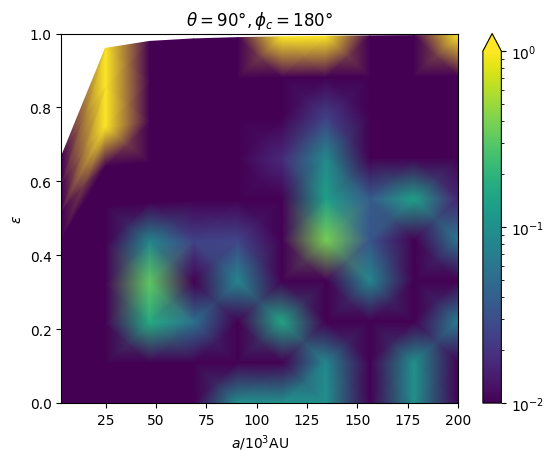

In [6]:
fig, ax = plt.subplots()
ax.set_title(r'$\theta={}\degree, \phi_c={}\degree$'.format('%d'%thetas[theta],'%d'%phi_cs[phi_c]))
ax.set_xlabel(r'$a/10^3\mathrm{AU}$')
ax.set_ylabel(r'$\epsilon$')

# plot data
cax = ax.pcolormesh(X, Y, np.where(result_fallin_ave[:,:,theta,phi_c]==0, 1e-2, result_fallin_ave[:,:,theta,phi_c]), shading='gouraud', norm=colors.LogNorm(vmin=1e-2, vmax=1))  # avoid log0
# add the colorbar
cbar = fig.colorbar(cax, extend='max')
cax.set_clim(1e-2, 1)
ax.set_ylim([0, 1])
ax.set_xlim([3,200])
plt.show()